# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed'] 
        city_country = city_weather['sys']['country'] 
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | akobo
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | arawa
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | olinda
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | antonio enes
Processing Record 12 of Set 1 | hengchun
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | ban dan lan hoi
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | nova sintra
Processing Record 20 of Set 1 | muroto-misakicho
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | fortuna
Processing Record 23

Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | egilsstadir
Processing Record 42 of Set 4 | vilyuchinsk
Processing Record 43 of Set 4 | chonchi
Processing Record 44 of Set 4 | mitu
Processing Record 45 of Set 4 | kone
Processing Record 46 of Set 4 | airuk
Processing Record 47 of Set 4 | ushtobe
Processing Record 48 of Set 4 | horta
Processing Record 49 of Set 4 | edgewater
Processing Record 0 of Set 5 | mersa matruh
Processing Record 1 of Set 5 | iskitim
Processing Record 2 of Set 5 | den helder
Processing Record 3 of Set 5 | texarkana
Processing Record 4 of Set 5 | saint-paul
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | crane
Processing Record 7 of Set 5 | afaahiti
Processing Record 8 of Set 5 | tanjung selor
City not found. Skipping...
Processing Record 9 of Set 5 | klyuchi
Processing Record 10 of Set 5 | east london
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | hami

Processing Record 35 of Set 8 | jiangyou
Processing Record 36 of Set 8 | rabo de peixe
Processing Record 37 of Set 8 | miyanoura
City not found. Skipping...
Processing Record 38 of Set 8 | amantea
Processing Record 39 of Set 8 | yuzhno-kurilsk
Processing Record 40 of Set 8 | mesudiye
Processing Record 41 of Set 8 | vila velha
Processing Record 42 of Set 8 | port macquarie
Processing Record 43 of Set 8 | wuhu
Processing Record 44 of Set 8 | gumi
Processing Record 45 of Set 8 | pagar alam
Processing Record 46 of Set 8 | majene
Processing Record 47 of Set 8 | yanbu
Processing Record 48 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 49 of Set 8 | amga
Processing Record 0 of Set 9 | derzhavinsk
Processing Record 1 of Set 9 | tocopilla
Processing Record 2 of Set 9 | sulya
Processing Record 3 of Set 9 | east ballina
Processing Record 4 of Set 9 | lampazos de naranjo
Processing Record 5 of Set 9 | vorkuta
Processing Record 6 of Set 9 | korsakov
Processing Record 7 of Set 9 

Processing Record 23 of Set 12 | malabar
Processing Record 24 of Set 12 | turaif
Processing Record 25 of Set 12 | ouarzazat
Processing Record 26 of Set 12 | skidaway island
Processing Record 27 of Set 12 | itaituba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,akobo,7.4344,3.9497,26.61,59,100,0.77,NG,1700157959
1,avarua,-21.2078,-159.7750,23.03,64,95,4.63,CK,1700157959
2,arawa,-6.2132,155.5367,22.55,83,58,2.00,PG,1700157959
3,invercargill,-46.4000,168.3500,8.34,93,100,1.74,NZ,1700157959
4,nemuro,43.3236,145.5750,9.03,70,95,7.18,JP,1700157959


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,akobo,7.4344,3.9497,26.61,59,100,0.77,NG,1700157959
1,avarua,-21.2078,-159.7750,23.03,64,95,4.63,CK,1700157959
2,arawa,-6.2132,155.5367,22.55,83,58,2.00,PG,1700157959
3,invercargill,-46.4000,168.3500,8.34,93,100,1.74,NZ,1700157959
4,nemuro,43.3236,145.5750,9.03,70,95,7.18,JP,1700157959


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

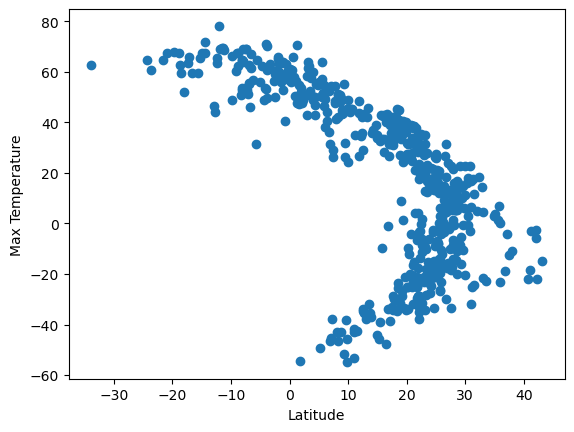

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

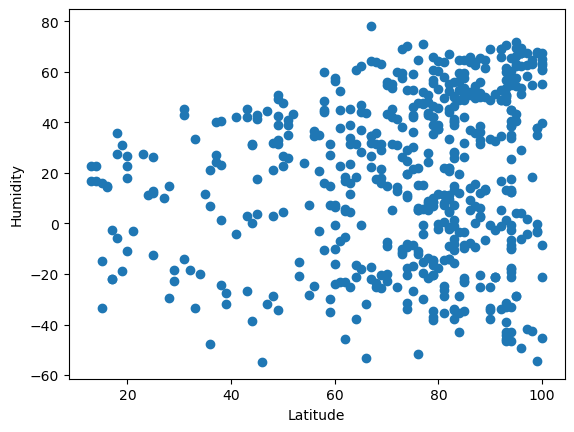

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

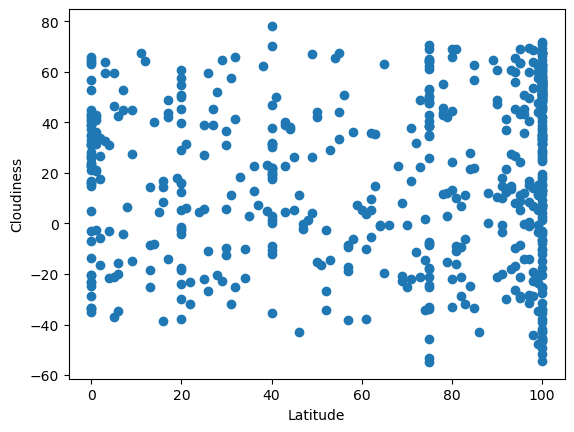

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

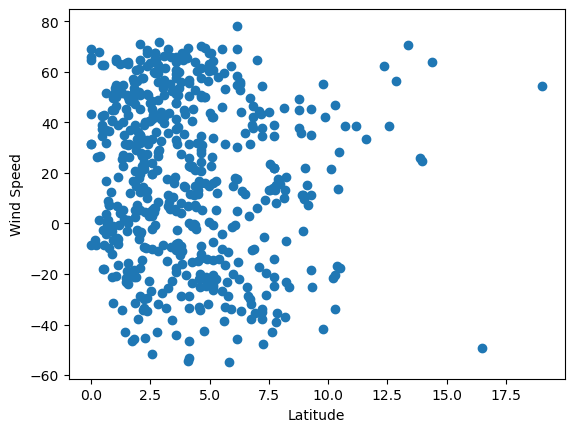

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,akobo,7.4344,3.9497,26.61,59,100,0.77,NG,1700157959
4,nemuro,43.3236,145.5750,9.03,70,95,7.18,JP,1700157959
6,ribeira grande,38.5167,-28.7000,21.22,94,75,10.73,PT,1700157718
8,stanley,54.8680,-1.6985,5.95,94,20,1.03,GB,1700157960
9,longyearbyen,78.2186,15.6401,-12.09,67,40,6.17,SJ,1700157960


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,23.03,64,95,4.63,CK,1700157959
2,arawa,-6.2132,155.5367,22.55,83,58,2.00,PG,1700157959
3,invercargill,-46.4000,168.3500,8.34,93,100,1.74,NZ,1700157959
5,olinda,-8.0089,-34.8553,28.85,74,75,3.60,BR,1700157960
7,grytviken,-54.2811,-36.5092,1.71,99,100,4.10,GS,1700157960


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8936851931982492
***There is a strong correlation between max temp and latitude in the northern hemisphere


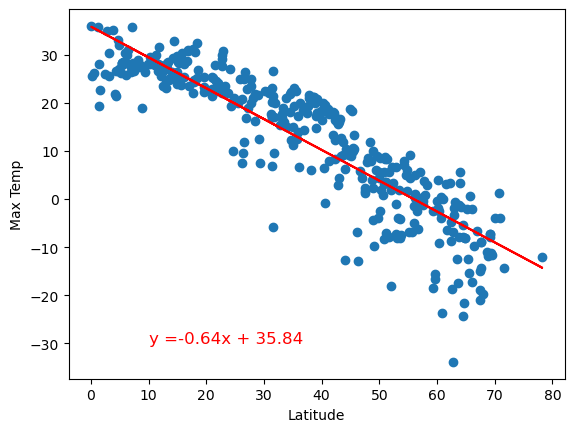

In [30]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))
print("***There is a strong correlation between max temp and latitude in the northern hemisphere")

The r-value is: 0.6678814162518403
There is a strong correlation between max temp. and latitude in the southern hemisphere.


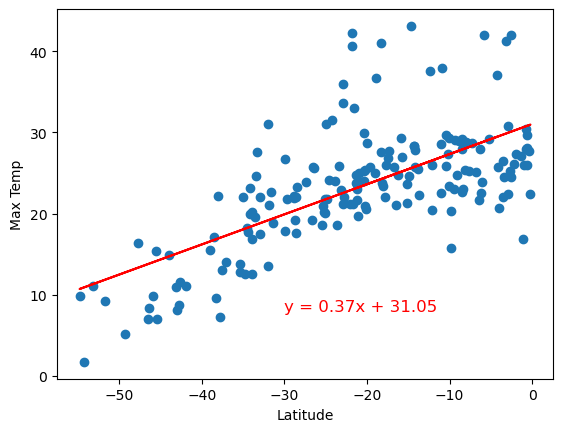

In [31]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))
print("There is a strong correlation between max temp. and latitude in the southern hemisphere.")

**Discussion about the linear relationship:

There is a strong correlation between max temp and latitude in the northern hemisphere

There is a strong correlation between max temp. and latitude in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3341418832581995


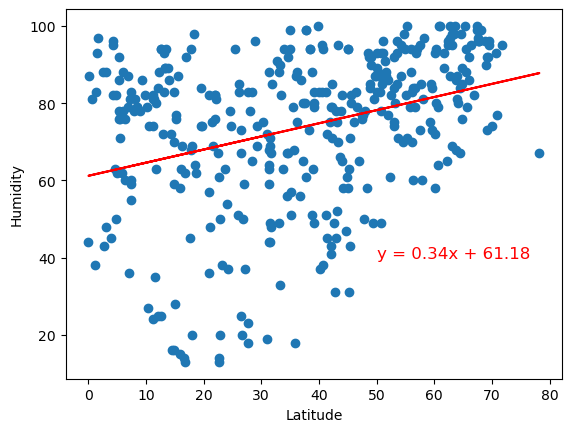

In [32]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: -0.025629835295303466


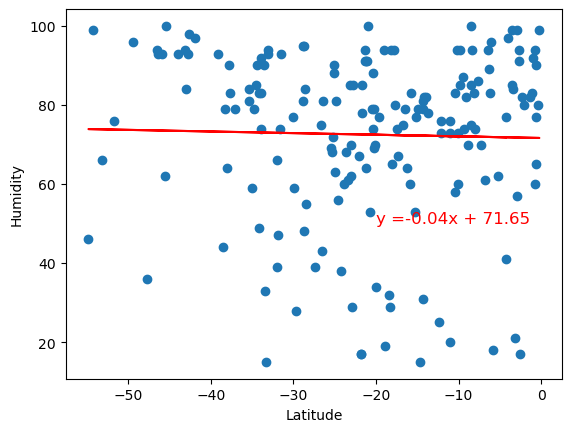

In [33]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:

There is a slight correlation between humidity and latitude in the northern hemisphere

There is no correlation between humidity and latitude in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13125283370426724


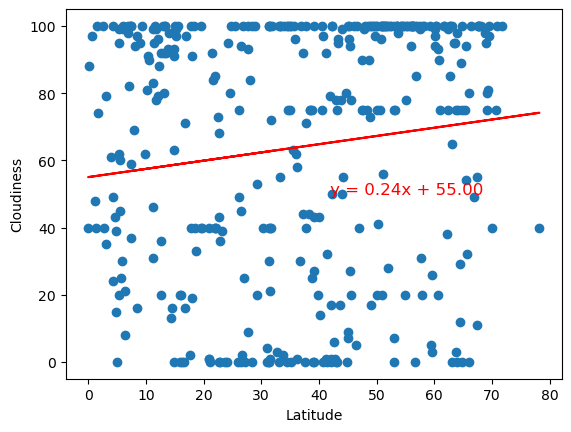

In [34]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: -0.16404756440751495


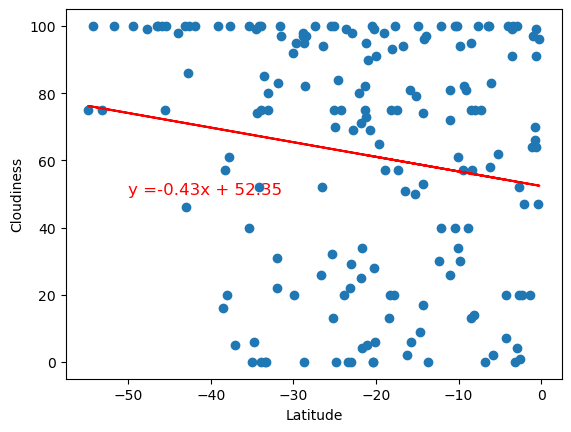

In [35]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:

There is a positive correlation between cloudiness and latitude in the northern hemisphere

There is a negitive correlation between cloudiness and latitude in the southern hemishpere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04504634825872096


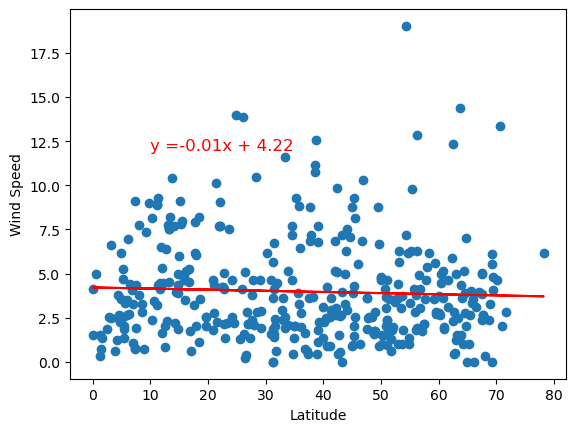

In [36]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.26963859890699393


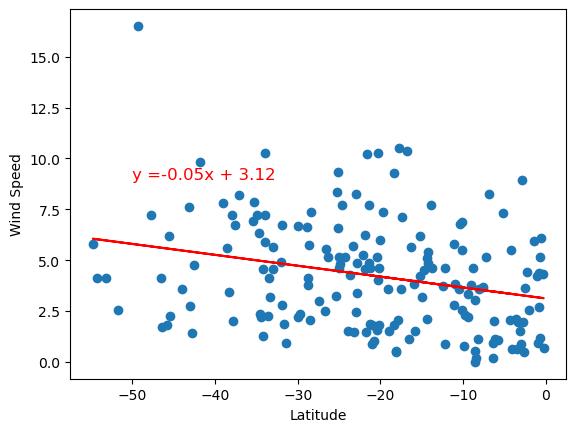

In [37]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:

There is no correlation between wind speed and latitude in the northern hemisphere 

There is a very slight correlation between wind speed and latitude in the southern hemisphere